In [1]:
import sys
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.io as pio
import psutil
from scipy import stats
from sklearn import datasets
from xgboost import XGBRegressor,XGBClassifier
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
sys.path.append('C:\\DATA_SCIENCE')
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, KFold, cross_val_score, GridSearchCV, cross_validate 
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, recall_score
from sklearn.preprocessing import LabelEncoder

In [2]:
from eda_lib.eda import *
from ml_lib.to_ML import *
from sql_lib.sql_connector import *

In [3]:
conn = connector()

In [4]:
table_show()

[{'Tables_in_australia_fires_2': 'fire_archive_M6_96619'},
 {'Tables_in_australia_fires_2': 'fire_archive_V1_96617'},
 {'Tables_in_australia_fires_2': 'fire_nrt_M6_96619'},
 {'Tables_in_australia_fires_2': 'fire_nrt_V1_96617'},
 {'Tables_in_australia_fires_2': 'student_findings'}]

In [5]:
am6 = table_extractor('fire_archive_M6_96619')

In [6]:
av1 = table_extractor('fire_archive_V1_96617')

In [7]:
nrt_m6 = table_extractor('fire_nrt_M6_96619')

In [8]:
nrt_v1 = table_extractor('fire_nrt_V1_96617')

In [9]:
results = table_extractor('student_findings')

In [10]:
print(am6.isnull().sum(), print(av1.isnull().sum(), nrt_m6.isnull().sum(), nrt_v1.isnull().sum()))  #no Nans

index         0
latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_ti5    0
frp           0
fire_type     0
dtype: int64 index         0
latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
dtype: int64 index         0
latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_ti5    0
frp           0
daynight      0
dtype: int64
index         0
latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
f

In [11]:
am6.shape, av1.shape, nrt_m6.shape, nrt_v1.shape                 #we have 2 dataframes for each Satellite.

((36011, 16), (184778, 15), (183593, 15), (956257, 15))

In [12]:
av1.columns, nrt_v1.columns

(Index(['index', 'latitude', 'longitude', 'bright_ti4', 'scan', 'track',
        'acq_date', 'acq_time', 'satellite', 'instrument', 'confidence',
        'version', 'bright_ti5', 'frp', 'fire_type'],
       dtype='object'),
 Index(['index', 'latitude', 'longitude', 'bright_ti4', 'scan', 'track',
        'acq_date', 'acq_time', 'satellite', 'instrument', 'confidence',
        'version', 'bright_ti5', 'frp', 'daynight'],
       dtype='object'))

In [17]:
nrt_v1.drop(columns='daynight', inplace=True)

In [18]:
av1.columns.difference(am6.columns), nrt_v1.columns.difference(nrt_m6.columns)

(Index(['bright_ti4', 'bright_ti5'], dtype='object'),
 Index(['bright_ti4', 'bright_ti5'], dtype='object'))

In [19]:
am6.shape, av1.shape, nrt_m6.shape, nrt_v1.shape

((36011, 16), (184778, 15), (183593, 15), (956257, 14))

In [20]:
am6.dtypes, av1.dtypes, nrt_m6.dtypes, nrt_v1.dtypes

(index           int64
 latitude       object
 longitude     float64
 brightness    float64
 scan          float64
 track         float64
 acq_date       object
 acq_time        int64
 satellite      object
 instrument     object
 confidence      int64
 version       float64
 bright_t31    float64
 frp           float64
 daynight       object
 fire_type       int64
 dtype: object,
 index           int64
 latitude       object
 longitude     float64
 bright_ti4    float64
 scan          float64
 track         float64
 acq_date       object
 acq_time        int64
 satellite      object
 instrument     object
 confidence     object
 version         int64
 bright_ti5    float64
 frp           float64
 fire_type       int64
 dtype: object,
 index           int64
 latitude       object
 longitude     float64
 brightness    float64
 scan          float64
 track         float64
 acq_date       object
 acq_time        int64
 satellite      object
 instrument     object
 confidence      int64
 v

In [21]:
le = LabelEncoder()
def encoder(df):
    """Encodes all categorical columns in dataframe to numeric"""
    cat_cols = (df.dtypes =="object")
    object_cols = list(cat_cols[cat_cols].index)
    print("Categorical variables:")
    print(object_cols)    
    for col in object_cols:
        df[col] = le.fit_transform(df[col])

In [22]:
encoder(am6), encoder(nrt_m6), encoder(av1), encoder(nrt_v1)

Categorical variables:
['latitude', 'acq_date', 'satellite', 'instrument', 'daynight']
Categorical variables:
['latitude', 'acq_date', 'satellite', 'instrument', 'version', 'daynight']
Categorical variables:
['latitude', 'acq_date', 'satellite', 'instrument', 'confidence']
Categorical variables:
['latitude', 'acq_date', 'satellite', 'instrument', 'confidence', 'version']


(None, None, None, None)

<AxesSubplot:>

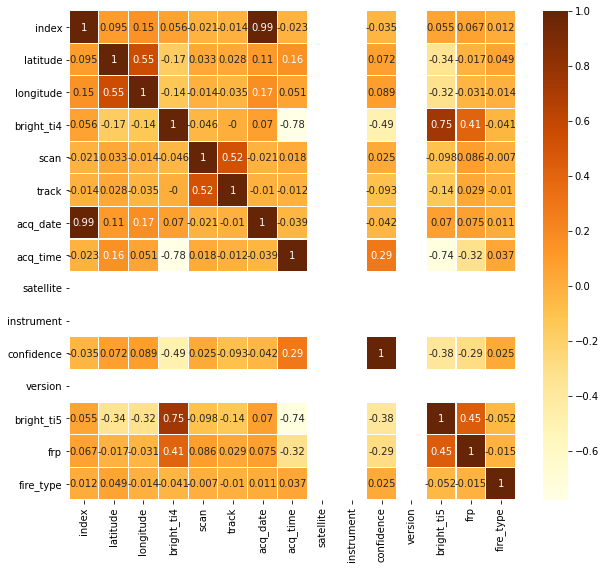

In [23]:
corr_visual(av1)

<AxesSubplot:>

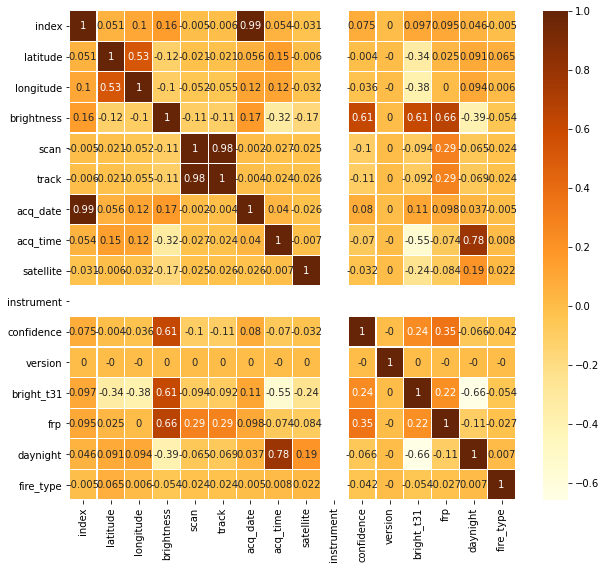

In [24]:
corr_visual(am6)

In [25]:
X, y = targeter(av1, 'fire_type')
X2, y2 = targeter(am6, 'fire_type')

In [26]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=151)
X_train2, X_test2, y_train2 , y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=151)

In [27]:
model = XGBClassifier()
model2 = XGBClassifier()

In [28]:
model.fit(X_train, y_train)
model2.fit(X_train2, y_train2)

[15:39:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
model.score(X_test, y_test)*100 , model2.score(X_test2, y_test2)*100

(99.01233899772703, 99.73622101901985)

In [35]:
pred_v1_test = model.predict(X_test)
pred_m6_test = model2.predict(X_test2)

In [36]:
sca, scb = recall_score(y_test, pred_v1_test, average='micro'), recall_score(y_test2, pred_m6_test, average='micro')

In [42]:
sca2, scb2 = accuracy_score(y_test, pred_v1_test), accuracy_score(y_test2, pred_m6_test)

In [60]:
scores_V1 = {'index' : ['Daniel'], 'Chosen_model' : ['XGBClassifier'], 'Recall Score' : [sca], 'Accuracy Score' : [sca2]}
scores_M6 = {'index' : ['Daniel'], 'Chosen_model' : ['XGBClassifier'], 'Recall Score' : [scb], 'Accuracy Score' : [scb2]} 
#recall score and accuracy score from both sattelites

In [89]:
scores = {'index' : ['Daniel', 'Daniel'], 'Chosen_model' : ['XGBClassifier', 'XGBClassifier' ], 'Recall Score' : [sca, scb], 'Accuracy Score' : [sca2, scb2]}

In [91]:
scoresdf = pd.DataFrame(scores)
scoresdf

,index,Chosen_model,Recall Score,Accuracy Score
0,Daniel,XGBClassifier,0.990123,0.990123
1,Daniel,XGBClassifier,0.997362,0.997362


In [99]:
scoresdb = scoresdf.to_sql(name = 'DanielResults', con=conn)

DatabaseError: Execution failed on sql: SELECT name FROM sqlite_master WHERE type='table' AND name=?;
not all arguments converted during string formatting
unable to rollback